<a href="https://colab.research.google.com/github/Pritija11/workshop-1/blob/main/wrkshp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 Exercise 1 - Implementation of Naive Bayes Algorithm
Build a Sentiment Analysis Model for IMDB Movie Review Dataset
Dataset : IMDB Movie Review is available in shared drive.
Question:
You are tasked with building a sentiment analysis model to classify movie reviews as positive or negative
using the IMDB Movie Review Dataset.
Part 1:
1. Load the dataset and preprocess the reviews.
a. Convert all text to lowercase.
b. Remove non-alphabetic characters (punctuation).
c. Tokenize the reviews and remove common stopwords.
d. Apply stemming to reduce words to their root form.
2. Split the dataset into training and testing sets (80% training, 20% testing).
3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.
a. Implement a Bag-of-Words model using CountVectorizer.
b. Train the Naive Bayes classifier using the training set.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv('/content/drive/MyDrive/dataset/IMDB Dataset.csv')



In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()

    cleaned = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return " ".join(cleaned)

df['review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_counts, y_train)
predictions = model.predict(X_test_counts)

In [7]:

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


y_test_binary = y_test.map({'positive': 1, 'negative': 0})
probs = model.predict_proba(X_test_counts)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test_binary, probs)}")

Accuracy: 0.8502
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      5012
    positive       0.87      0.82      0.85      4988

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
[[4387  625]
 [ 873 4115]]
ROC-AUC Score: 0.9198557783692833


3.1 Feature Selection using Wrapper Methods.
Dataset: Breast Cancer Prognostic Dataset
Objective
You are tasked with identifying the most important features in predicting breast cancer prognosis using the
Breast Cancer Prognostic Dataset from the UCI Machine Learning Repository. Apply a wrapper method
(Recursive Feature Elimination) to select the best features and evaluate your model’s performance.
Part 1: Data Loading and Preprocessing
1. Load the Breast Cancer Prognostic Dataset.
2. Dataset is available in Drive.
3. Perform basic exploratory data analysis (EDA) to understand the dataset:
• Summarize key statistics for each feature.
• Check for missing values and handle them appropriately.
4. Split the dataset into training (80%) and testing (20%) sets.

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(X.describe())
print(X.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Part 2: Apply a Wrapper Method
1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:
• Select the top 5 features that contribute the most to predicting the target variable.
• Visualize the ranking of features.
2. Train the Logistic Regression model using only the selected features.

                    Feature  Rank
0               mean radius     1
11            texture error     1
25        worst compactness     1
20             worst radius     1
26          worst concavity     1
28           worst symmetry     2
6            mean concavity     3
27     worst concave points     4
5          mean compactness     5
24         worst smoothness     6
7       mean concave points     7
12          perimeter error     8
21            worst texture     9
8             mean symmetry    10
1              mean texture    11
4           mean smoothness    12
22          worst perimeter    13
13               area error    14
29  worst fractal dimension    15
2            mean perimeter    16
10             radius error    17
15        compactness error    18
9    mean fractal dimension    19
16          concavity error    20
18           symmetry error    21
17     concave points error    22
14         smoothness error    23
3                 mean area    24
23            

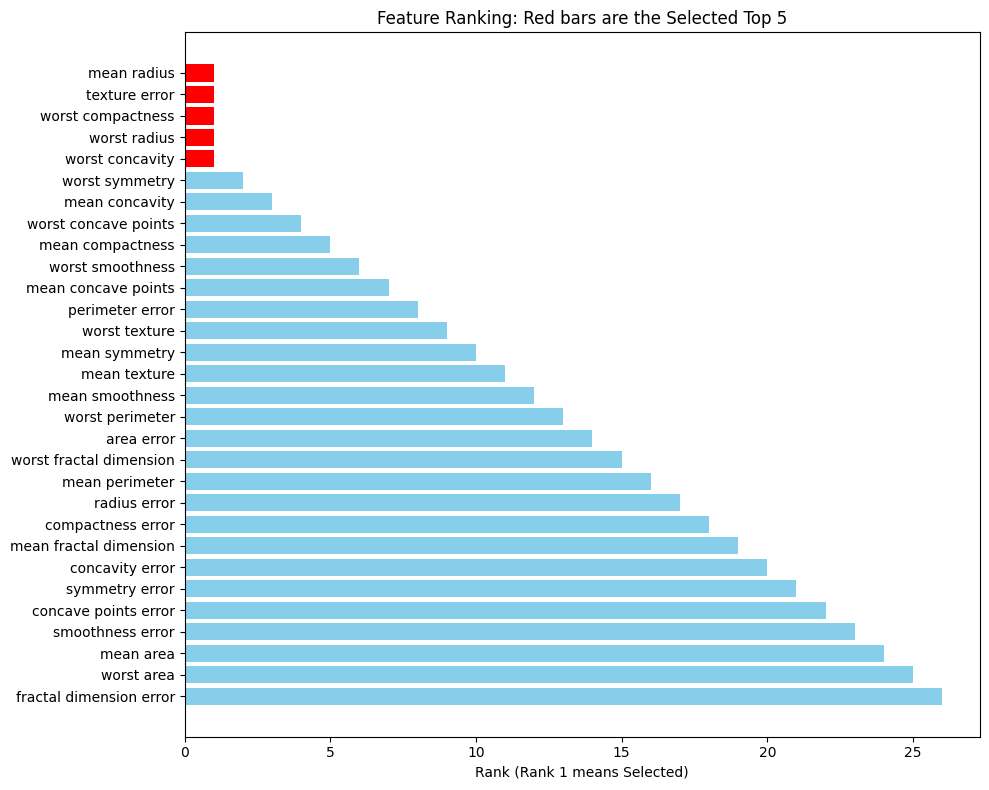

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)

ranking = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_}).sort_values(by='Rank')
print(ranking)

plt.figure(figsize=(10, 8))

colors = ['red' if r == 1 else 'skyblue' for r in ranking['Rank']]
plt.barh(ranking['Feature'], ranking['Rank'], color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Rank (Rank 1 means Selected)')
plt.title('Feature Ranking: Red bars are the Selected Top 5')
plt.tight_layout()
plt.savefig('feature_ranking.png')

X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

Part 3: Model Evaluation
1. Evaluate the model’s performance using the testing set:
• Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
2. Compare the performance of the model trained on all features versus the model trained on the selected
features.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model.fit(X_train_sel, y_train)
preds = model.predict(X_test_sel)
probs = model.predict_proba(X_test_sel)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")
print(f"ROC-AUC: {roc_auc_score(y_test, probs)}")


model.fit(X_train, y_train)
all_preds = model.predict(X_test)
print(f"Full Model Accuracy: {accuracy_score(y_test, all_preds)}")

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1: 0.9790209790209791
ROC-AUC: 0.9983622666229938
Full Model Accuracy: 0.956140350877193


Part 4: Experiment
1. Experiment with different numbers of selected features (e.g., top 3, top 7).
2. Discuss how feature selection affects model performance.

In [11]:
for n in [3, 7]:
    rfe_exp = RFE(estimator=model, n_features_to_select=n)
    X_train_exp = rfe_exp.fit_transform(X_train, y_train)
    X_test_exp = rfe_exp.transform(X_test)

    model.fit(X_train_exp, y_train)
    score = model.score(X_test_exp, y_test)
    print(f"Accuracy with top {n} features: {score}")

Accuracy with top 3 features: 0.8070175438596491
Accuracy with top 7 features: 0.9736842105263158
